In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [3]:
fpath = './attentive-diffusion.csv'
df_attentive_diffusion = pd.read_csv(fpath, sep='\t')
attentive_diffusion_dict = df_attentive_diffusion.set_index('model').to_dict()

In [205]:
def plot_dset(fpath, dset_name):

    df = pd.read_csv(fpath, index_col=False)
    dset_acc = df.set_index('model').to_dict()['acc']
    dset_attentive_diffusion = attentive_diffusion_dict[dset_name]

    shared_models = dset_acc.keys() and dset_attentive_diffusion.keys()
    dict_intersection = {k: (dset_acc[k], dset_attentive_diffusion[k]) for k in shared_models}
    new_df = pd.DataFrame.from_dict(dict_intersection, orient='index')
    new_df = new_df.reset_index(level=0)
    new_df.columns = ['model', 'few_shot', 'attentive_diffusion']

    sns.set_style("darkgrid")
    markers=['x', 'D', 's', '<', '>', 'v', 'X', '+', 'P']
    g = sns.lmplot(x="attentive_diffusion", y="few_shot", hue="model", data=new_df, fit_reg=False, markers=markers, palette="tab10", scatter_kws={"s": 150})
    sns.regplot(x="attentive_diffusion", y="few_shot", data=new_df, scatter=False, ax=g.axes[0, 0])
    plt.xlabel("Attentive Diffusion")
    plt.ylabel("Few-shot Accuracy")
    plt.title(dset_name)
    plt.show()
    
     

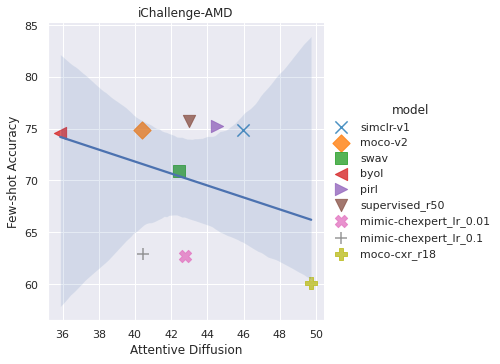

In [190]:
plot_dset('./few-shot/ichallenge_amd.csv', 'iChallenge-AMD')

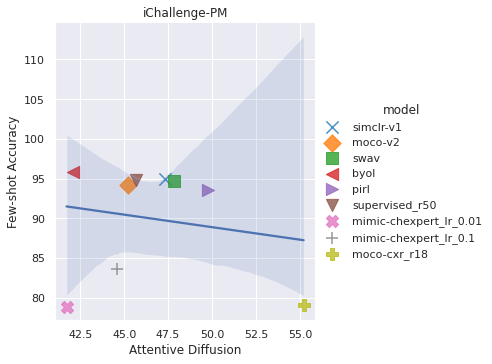

In [191]:
plot_dset('./few-shot/ichallenge_pm.csv', 'iChallenge-PM')

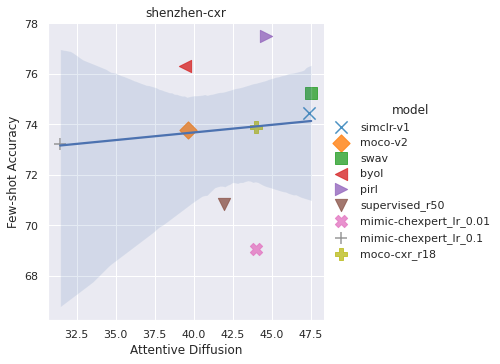

In [206]:
plot_dset('./few-shot/shenzhencxr.csv', 'shenzhen-cxr')

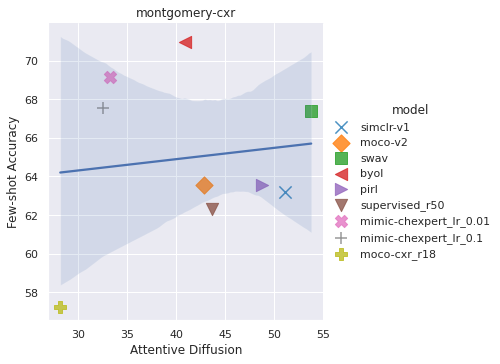

In [207]:
plot_dset('./few-shot/montgomerycxr.csv', 'montgomery-cxr')